Number of records: 768
Number of features: 9
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Number of records in each category:
 0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int

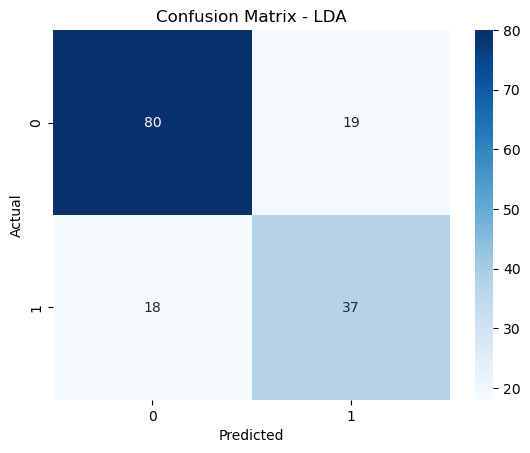

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



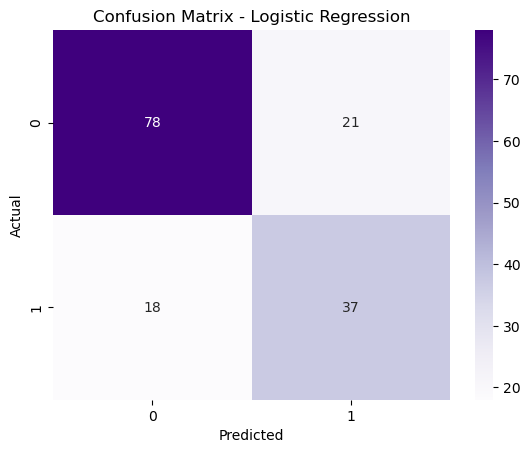

LDA Prediction for new record: [1]
Logistic Regression Prediction for new record: [1]


C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df_diabetes = pd.read_csv(r'C:\Users\Bithi\Downloads\archive (3)\diabetes.csv')

# Identify dependent and independent features
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Display number of records and features
print("Number of records:", len(df_diabetes))
print("Number of features:", len(df_diabetes.columns))

# Display feature names
print("Feature names:", df_diabetes.columns.tolist())

# Display number of records in each category of the target feature 'Outcome'
print("Number of records in each category:\n", df_diabetes['Outcome'].value_counts())

# Display information about the dataframe
print("Dataframe information:\n", df_diabetes.info())

# Display numerical description of the dataframe
print("Numerical description:\n", df_diabetes.describe())

# Check for missing values
print("Missing values:\n", df_diabetes.isnull().sum())

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions on the test set
lda_predictions = lda_model.predict(X_test)

# Classification Report and Confusion Matrix for LDA
print("LDA Classification Report:\n", classification_report(y_test, lda_predictions))
cm_lda = confusion_matrix(y_test, lda_predictions)
sns.heatmap(cm_lda, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - LDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # To avoid convergence errors
logreg_model.fit(X_train, y_train)

# Predictions on the test set using Logistic Regression
logreg_predictions = logreg_model.predict(X_test)

# Classification Report and Confusion Matrix for Logistic Regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))
cm_logreg = confusion_matrix(y_test, logreg_predictions)
sns.heatmap(cm_logreg, annot=True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generating a new unseen record for prediction
new_record = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Prediction using LDA model
lda_new_prediction = lda_model.predict(new_record)
print("LDA Prediction for new record:", lda_new_prediction)

# Prediction using Logistic Regression model
logreg_new_prediction = logreg_model.predict(new_record)
print("Logistic Regression Prediction for new record:", logreg_new_prediction)